# MNIST Dataset

This base has an image of the digits from 0 to 9.

In [1]:
!pip install yellowbrick==1.4 scikit-learn==1.0.2

  Using cached yellowbrick-1.4-py3-none-any.whl.metadata (7.6 kB)
Using cached yellowbrick-1.4-py3-none-any.whl (274 kB)
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 1.5
    Uninstalling yellowbrick-1.5:
      Successfully uninstalled yellowbrick-1.5


## Importing Libs

In [2]:
# Standard libs
import numpy as np
import pandas as pd

# Dataviz libs
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.style import set_palette

# Datasets libs
from sklearn import datasets

# Dimensionality Reduction libs
import umap
from yellowbrick.features import PCA
from yellowbrick.features import Manifold
from yellowbrick.text import UMAPVisualizer

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

pixel_values, targets = data
targets = targets.astype(int)

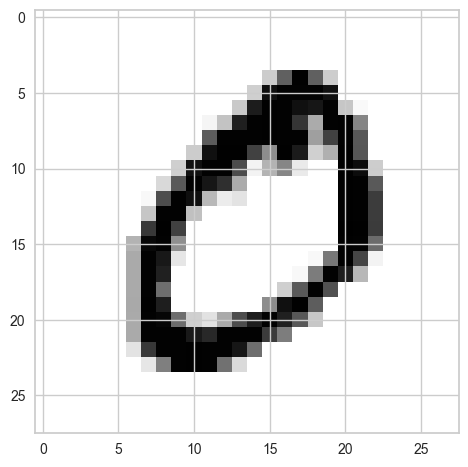

In [4]:
single_digit = pixel_values.loc[1, :].values.reshape(28, 28)
plt.imshow(single_digit, cmap='binary');

In [5]:
pixel_sample = pixel_values.loc[:3000, :].copy()
targets_sample = targets.loc[:3000].copy()

## PCA

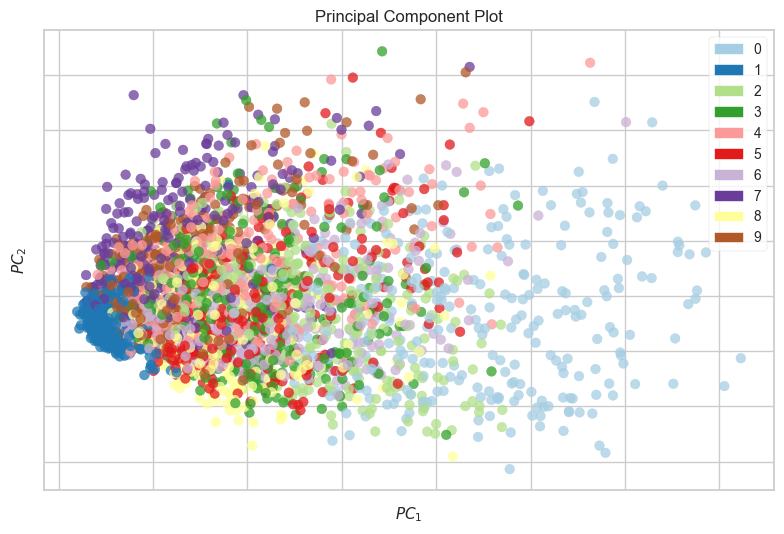

In [6]:
set_palette('paired')

visualizer = PCA(scale=True, classes=np.unique(targets_sample))
visualizer.fit_transform(pixel_sample, targets_sample)
visualizer.show();

Although PCA did not distinguish the groups well, it appears that this data is segmented, as it is. Let's try another dimensionality reduction technique, known as `TSNE`.

## TSNE

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


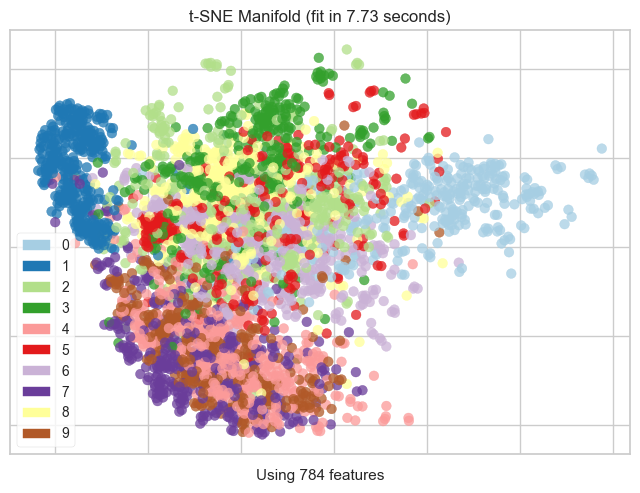

In [7]:
visualizer = Manifold(manifold='tsne', classes=np.unique(targets_sample))
visualizer.fit_transform(pixel_sample, targets_sample)
visualizer.show();

In [ ]:
#